In [1]:
from datasets import load_metric, load_from_disk, Dataset, DatasetDict, load_dataset, concatenate_datasets
import pandas as pd
import seaborn as sns

# load arrow file

In [11]:
wiki_dataset = load_from_disk("/opt/ml/data/qg_wiki") # arrow file이 담긴 '폴더'명

In [12]:
wiki_dataset

Dataset({
    features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
    num_rows: 16530
})

# convert Dataset to DataFrame

In [52]:
df_qg = wiki_dataset.to_pandas()

In [53]:
df_qg

,__index_level_0__,answers,context,document_id,id,question,title
0,1,"{'answer_start': [6], 'text': ['나라 목록']}","이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",1,b,세계 각 지역의 현황과 주권 승인 정보를 기재하는 문서의 이름은?,b
1,1,"{'answer_start': [433], 'text': ['백남준']}",현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,1,b,"""큰대문집""에서 18세까지 살고, 졸업과 함께 독일로 유학을 떠나 뮌헨 대학교 및 ...",b
2,1,"{'answer_start': [0], 'text': ['아오조라 문고']}","아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",1,b,일본어판 구텐베르크 프로젝트로 불리는 일본의 인터넷 전자도서관 이름은?,b
3,1,"{'answer_start': [429], 'text': ['데니스 리치']}",켄 톰슨(Ken Thompson) 등과 함께 최초의 유닉스(Unix) 시스템을 개발...,1,b,애플 컴퓨터는 누구의 업적을 기반으로 하고 있어?,b
4,1,"{'answer_start': [0], 'text': ['주기율표']}","주기율표(週期律表, 주기률표, periodic table) 또는 주기표(週期表)는 ...",1,b,원소를 구분하기 쉽게 성질에 따라 배열한 표가 뭐야?,b
...,...,...,...,...,...,...,...
16525,1,"{'answer_start': [0], 'text': ['타바투이호']}",타바투이호의 형성과 관련하여 전해지는 전설이 있다.\n\n예전에 이 지역에는 아름답...,1,b,네이바가 어느 호수에서 태어났어?,b
16526,1,"{'answer_start': [0], 'text': ['2022년 FIFA 월드컵...",2022년 FIFA 월드컵 유럽 지역 예선 플레이오프 진행 방식은 2019년 12월...,1,b,결승전에서 승리한 3개 팀은 언제 본선 진출이 가능한가?,b
16527,1,"{'answer_start': [8], 'text': ['자주국방론']}","박정희 정부가 자주국방론을 내놓은 배경은 ""아시아의 공산주의 국가와 자유진영 국가의...",1,b,박정희 정부가 분쟁의 책임을 당사국에 국한시킨 주장이 뭐야?,b
16528,1,"{'answer_start': [0], 'text': ['오키나와 현립 박물관·미술...","오키나와 현립 박물관·미술관( , Okinawa Prefectural Museum ...",1,b,오키나와에 있는 최초의 복합 문화시설은?,b


# drop 'answer_start' under 30 upper 200 

In [54]:
for i in range(len(df_qg)):
    if df_qg['answers'][i]['answer_start'][0] < 30 or df_qg['answers'][i]['answer_start'][0] > 200:
        df_qg = df_qg.drop([i])


In [55]:
df_qg

,__index_level_0__,answers,context,document_id,id,question,title
11,1,"{'answer_start': [75], 'text': ['삼각함수']}",기원전 2~1세기 그리스의 히파르코스와 프톨레마이오스 등은 각도에 대해 달라지는 현...,1,b,기원전 2~1세기 그리스와 프톨레마이오스 등에서 각도에 대해 달라지는 현을 다룬 적...,b
19,1,"{'answer_start': [120], 'text': ['채팅']}",사람들이 직접 만나서 나누는 대화와 같이 인터넷이나 온라인서비스에 접속한 이용자끼리...,1,b,PC통신으로 하는 서비스는 뭐야?,b
45,1,"{'answer_start': [31], 'text': ['영어']}","잉글랜드어(English language), 또는 흔히 영어(英語)는 영국의 잉글랜...",1,b,잉글랜드에서 유래한 말이 뭐야?,b
56,1,"{'answer_start': [45], 'text': ['마오둔']}","자는 안빙(雁氷)으로, 본명은 심덕홍(沈德鴻), 별명은 심안빙(沈雁氷), 필명은 마...",1,b,마오쩌둥의 필명이 뭐야?,b
75,1,"{'answer_start': [55], 'text': ['가곡']}",독일에서는 리트(Lied 혹은 Kunstlied. 복수형은 리더)라고 부른다. \n...,1,b,프랑스에서 샹송이 무슨 노래야?,b
...,...,...,...,...,...,...,...
16498,1,"{'answer_start': [139], 'text': ['태양로']}",대기권 재진입에 견디는 초내열 타일을 개발하기 위해서는 적어도 우주왕복선이 대기권으...,1,b,우주왕복선이 대기권으로 들어올 때 우주선이 받는 내열 온도보다 높은 약 2000∼3...,b
16508,1,"{'answer_start': [87], 'text': ['자가사리']}",}}\n\n몸길이 10∼14cm이다. 퉁가리와 비슷하나 아래턱이 위턱보다 짧은 점으...,1,b,가슴지느러미살 안쪽 언저리에 톱니가 있는 점으로 구별되는 것은 뭐야?,b
16512,1,"{'answer_start': [81], 'text': ['솔라시도 태양광 발전단지']}","2019년 2월에 착공해, 2020년 3월에 준공했다.\n\n전남 해남군 산이면 구...",1,b,국내 최대 태양광 발전소가 어디야?,b
16519,1,"{'answer_start': [69], 'text': ['이재엽']}",2015 IeSF e스포츠 월드 챔피언십에서 우승을 차지하며 2016년 1월 에드워...,1,b,2016년 1월 에드워드 게이밍 아카데미의 탑 라이너로 입단한 인물은?,b


In [58]:
df_qg.reset_index(inplace=True)

In [59]:
df_qg

,index,__index_level_0__,answers,context,document_id,id,question,title
0,11,1,"{'answer_start': [75], 'text': ['삼각함수']}",기원전 2~1세기 그리스의 히파르코스와 프톨레마이오스 등은 각도에 대해 달라지는 현...,1,b,기원전 2~1세기 그리스와 프톨레마이오스 등에서 각도에 대해 달라지는 현을 다룬 적...,b
1,19,1,"{'answer_start': [120], 'text': ['채팅']}",사람들이 직접 만나서 나누는 대화와 같이 인터넷이나 온라인서비스에 접속한 이용자끼리...,1,b,PC통신으로 하는 서비스는 뭐야?,b
2,45,1,"{'answer_start': [31], 'text': ['영어']}","잉글랜드어(English language), 또는 흔히 영어(英語)는 영국의 잉글랜...",1,b,잉글랜드에서 유래한 말이 뭐야?,b
3,56,1,"{'answer_start': [45], 'text': ['마오둔']}","자는 안빙(雁氷)으로, 본명은 심덕홍(沈德鴻), 별명은 심안빙(沈雁氷), 필명은 마...",1,b,마오쩌둥의 필명이 뭐야?,b
4,75,1,"{'answer_start': [55], 'text': ['가곡']}",독일에서는 리트(Lied 혹은 Kunstlied. 복수형은 리더)라고 부른다. \n...,1,b,프랑스에서 샹송이 무슨 노래야?,b
...,...,...,...,...,...,...,...,...
2181,16498,1,"{'answer_start': [139], 'text': ['태양로']}",대기권 재진입에 견디는 초내열 타일을 개발하기 위해서는 적어도 우주왕복선이 대기권으...,1,b,우주왕복선이 대기권으로 들어올 때 우주선이 받는 내열 온도보다 높은 약 2000∼3...,b
2182,16508,1,"{'answer_start': [87], 'text': ['자가사리']}",}}\n\n몸길이 10∼14cm이다. 퉁가리와 비슷하나 아래턱이 위턱보다 짧은 점으...,1,b,가슴지느러미살 안쪽 언저리에 톱니가 있는 점으로 구별되는 것은 뭐야?,b
2183,16512,1,"{'answer_start': [81], 'text': ['솔라시도 태양광 발전단지']}","2019년 2월에 착공해, 2020년 3월에 준공했다.\n\n전남 해남군 산이면 구...",1,b,국내 최대 태양광 발전소가 어디야?,b
2184,16519,1,"{'answer_start': [69], 'text': ['이재엽']}",2015 IeSF e스포츠 월드 챔피언십에서 우승을 차지하며 2016년 1월 에드워...,1,b,2016년 1월 에드워드 게이밍 아카데미의 탑 라이너로 입단한 인물은?,b


In [17]:
df_qg.to_csv('30up200under.csv', index=False)

# merge dataset

In [ ]:
#재현님 팁!
cat_dataset = datasets.concatenate_datasets([train_dataset,valid_dataset],axis=0)

In [19]:
train_dataset = load_from_disk("/opt/ml/data/train_dataset") # arrow file이 담긴 '폴더'명

In [20]:
train_dataset

DatasetDict({
    train: Dataset({
        features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
        num_rows: 3952
    })
    validation: Dataset({
        features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
        num_rows: 240
    })
})

In [22]:
df_train = train_dataset['train'].to_pandas()

In [24]:
df_train

,title,context,question,id,answers,document_id,__index_level_0__
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}",47334,548
...,...,...,...,...,...,...,...
3947,이오 (위성),이오의 산\n이오의 산 목록\n 이오에는 100~150개의 산이 있다. 이들 산의 ...,대부분의 이오의 산이 형성되는데 영향을 끼친 것은?,mrc-0-005285,"{'answer_start': [317], 'text': ['지질 구조']}",8275,3445
3948,내니 다이어리,애니의 고군분투 뉴욕 입성기!!\n\n인류학자가 꿈인 21살 소녀 '애니(스칼렛 요...,애니는 어디서 태어났는가?,mrc-1-000699,"{'answer_start': [616], 'text': ['뉴저지']}",37764,450
3949,빈 필하모니 관현악단,1842년에 작곡가이자 지휘자인 오토 니콜라이가 빈 궁정 오페라극장 소속 관현악단을...,1854년에 니콜라이의 뒤를 이어 상임 지휘자로서 활동한 인물은?,mrc-0-003429,"{'answer_start': [255], 'text': ['칼 에케르트']}",12730,2252
3950,드래곤,원어는 고대 그리스어까지 거슬러 올라간다. 영어 문헌에 이 말이 나타나기 시작한 것...,드래곤의 암수 구분이 있는 신화는?,mrc-0-003956,"{'answer_start': [476], 'text': ['슬라브 신화']}",10924,2595


In [23]:
df_validation = train_dataset['validation'].to_pandas()

In [51]:
df_qg

,__index_level_0__,answers,context,document_id,id,question,title
11,1,"{'answer_start': [75], 'text': ['삼각함수']}",기원전 2~1세기 그리스의 히파르코스와 프톨레마이오스 등은 각도에 대해 달라지는 현...,1,b,기원전 2~1세기 그리스와 프톨레마이오스 등에서 각도에 대해 달라지는 현을 다룬 적...,b
19,1,"{'answer_start': [120], 'text': ['채팅']}",사람들이 직접 만나서 나누는 대화와 같이 인터넷이나 온라인서비스에 접속한 이용자끼리...,1,b,PC통신으로 하는 서비스는 뭐야?,b
45,1,"{'answer_start': [31], 'text': ['영어']}","잉글랜드어(English language), 또는 흔히 영어(英語)는 영국의 잉글랜...",1,b,잉글랜드에서 유래한 말이 뭐야?,b
56,1,"{'answer_start': [45], 'text': ['마오둔']}","자는 안빙(雁氷)으로, 본명은 심덕홍(沈德鴻), 별명은 심안빙(沈雁氷), 필명은 마...",1,b,마오쩌둥의 필명이 뭐야?,b
75,1,"{'answer_start': [55], 'text': ['가곡']}",독일에서는 리트(Lied 혹은 Kunstlied. 복수형은 리더)라고 부른다. \n...,1,b,프랑스에서 샹송이 무슨 노래야?,b
...,...,...,...,...,...,...,...
16498,1,"{'answer_start': [139], 'text': ['태양로']}",대기권 재진입에 견디는 초내열 타일을 개발하기 위해서는 적어도 우주왕복선이 대기권으...,1,b,우주왕복선이 대기권으로 들어올 때 우주선이 받는 내열 온도보다 높은 약 2000∼3...,b
16508,1,"{'answer_start': [87], 'text': ['자가사리']}",}}\n\n몸길이 10∼14cm이다. 퉁가리와 비슷하나 아래턱이 위턱보다 짧은 점으...,1,b,가슴지느러미살 안쪽 언저리에 톱니가 있는 점으로 구별되는 것은 뭐야?,b
16512,1,"{'answer_start': [81], 'text': ['솔라시도 태양광 발전단지']}","2019년 2월에 착공해, 2020년 3월에 준공했다.\n\n전남 해남군 산이면 구...",1,b,국내 최대 태양광 발전소가 어디야?,b
16519,1,"{'answer_start': [69], 'text': ['이재엽']}",2015 IeSF e스포츠 월드 챔피언십에서 우승을 차지하며 2016년 1월 에드워...,1,b,2016년 1월 에드워드 게이밍 아카데미의 탑 라이너로 입단한 인물은?,b


In [60]:
answers = []
context = []
question = []
id = []
a = [1]*(len(df_qg)+len(df_train)+len(df_validation))
b = ['b']*(len(df_qg)+len(df_train)+len(df_validation))
for idx, i in enumerate(range(len(df_qg)), start=1):
    context.append(df_qg['context'][i])
    answers.append(df_qg['answers'][i])
    question.append(df_qg['question'][i])
    id.append(str(idx))
for idx, i in enumerate(range(len(df_train)), start=len(df_qg)+1):
    context.append(df_train['context'][i])
    answers.append(df_train['answers'][i])
    question.append(df_train['question'][i])
    id.append(str(idx))
for idx, i in enumerate(range(len(df_validation)), start=len(df_train)+len(df_qg)+1):
    context.append(df_validation['context'][i])
    answers.append(df_validation['answers'][i])
    question.append(df_validation['question'][i])
    id.append(str(idx))

df_result = pd.DataFrame(data={'__index_level_0__':a, 'answers':answers,'context':context,'document_id':a, 'id':id, 'question':question,'title':answers})

In [61]:
df_result

,__index_level_0__,answers,context,document_id,id,question,title
0,1,"{'answer_start': [75], 'text': ['삼각함수']}",기원전 2~1세기 그리스의 히파르코스와 프톨레마이오스 등은 각도에 대해 달라지는 현...,1,1,기원전 2~1세기 그리스와 프톨레마이오스 등에서 각도에 대해 달라지는 현을 다룬 적...,"{'answer_start': [75], 'text': ['삼각함수']}"
1,1,"{'answer_start': [120], 'text': ['채팅']}",사람들이 직접 만나서 나누는 대화와 같이 인터넷이나 온라인서비스에 접속한 이용자끼리...,1,2,PC통신으로 하는 서비스는 뭐야?,"{'answer_start': [120], 'text': ['채팅']}"
2,1,"{'answer_start': [31], 'text': ['영어']}","잉글랜드어(English language), 또는 흔히 영어(英語)는 영국의 잉글랜...",1,3,잉글랜드에서 유래한 말이 뭐야?,"{'answer_start': [31], 'text': ['영어']}"
3,1,"{'answer_start': [45], 'text': ['마오둔']}","자는 안빙(雁氷)으로, 본명은 심덕홍(沈德鴻), 별명은 심안빙(沈雁氷), 필명은 마...",1,4,마오쩌둥의 필명이 뭐야?,"{'answer_start': [45], 'text': ['마오둔']}"
4,1,"{'answer_start': [55], 'text': ['가곡']}",독일에서는 리트(Lied 혹은 Kunstlied. 복수형은 리더)라고 부른다. \n...,1,5,프랑스에서 샹송이 무슨 노래야?,"{'answer_start': [55], 'text': ['가곡']}"
...,...,...,...,...,...,...,...
6373,1,"{'answer_start': [1084], 'text': ['제 양왕']}","연나라 군대의 사령관이 악의에서 기겁으로 교체되자, 전단은 스스로 신령의 계시를 받...",1,6374,전단이 연나라와의 전쟁에서 승리했을 당시 제나라의 왕은 누구인가?,"{'answer_start': [1084], 'text': ['제 양왕']}"
6374,1,"{'answer_start': [343], 'text': [''일곱 개의 신전 광장...",현재 우리가 볼 수 있는 티칼의 모습은 펜실베이니아 대학교와 과테말라 정부의 협조 ...,1,6375,공놀이 경기장 중 일부는 어디에 위치하고 있나?,"{'answer_start': [343], 'text': [''일곱 개의 신전 광장..."
6375,1,"{'answer_start': [247], 'text': ['미나미 지로']}",1940년 5월 1일 오전 창씨개명에 비협조적이라는 이유로 조선총독부 경무국에서 소...,1,6376,창씨개명령의 시행일을 미루는 것을 수락한 인물은?,"{'answer_start': [247], 'text': ['미나미 지로']}"
6376,1,"{'answer_start': [563], 'text': ['200,000명']}",빌카밤바 지역은 파차쿠티 황제 때 부터 잉카 제국에 속해있던 지역이었다. 스페인 군...,1,6377,망코 잉카가 쿠스코를 되찾기 위해 마련한 군사는 총 몇 명인가?,"{'answer_start': [563], 'text': ['200,000명']}"


# convert dataframe -> dataset and save arrow file

In [68]:
qg_dataset = Dataset.from_dict({'__index_level_0__':df_result['__index_level_0__'], 'answers':df_result['answers'],'context':df_result['context'],'document_id':df_result['document_id'], 'id':df_result['id'], 'question':df_result['question'],'title':df_result['title']})


In [69]:
qg_dataset

Dataset({
    features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
    num_rows: 6378
})

In [71]:
qg_dataset = qg_dataset.train_test_split(test_size=0.2)

In [72]:
qg_dataset

DatasetDict({
    train: Dataset({
        features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
        num_rows: 5102
    })
    test: Dataset({
        features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
        num_rows: 1276
    })
})

In [73]:
qg_dataset.save_to_disk('start_idx')

# concat dataset

In [100]:
train_dataset

DatasetDict({
    train: Dataset({
        features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
        num_rows: 3952
    })
    validation: Dataset({
        features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
        num_rows: 240
    })
})

In [99]:
train_dataset = load_from_disk("/opt/ml/data/train_dataset") # arrow file이 담긴 '폴더'명

In [104]:
from torch.utils.data import ConcatDataset
final_dataset = ConcatDataset([train_dataset['train'], train_dataset['validation'], qg_dataset])

In [105]:
a.save_to_disk('merge_dataset')

In [89]:
final_dataset = final_dataset.train_test_split()

AttributeError: 'ConcatDataset' object has no attribute 'train_test_split'

# read csv file

In [17]:
qg_wiki = pd.read_csv('qg_train.csv')

In [18]:
qg_wiki

,__index_level_0__,answers,context,document_id,id,question,title
0,1,"{'answer_start': [6], 'text': ['나라 목록']}","이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",1,b,세계 각 지역의 현황과 주권 승인 정보를 기재하는 문서의 이름은?,b
1,1,"{'answer_start': [433], 'text': ['백남준']}",현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,1,b,"""큰대문집""에서 18세까지 살고, 졸업과 함께 독일로 유학을 떠나 뮌헨 대학교 및 ...",b
2,1,"{'answer_start': [0], 'text': ['아오조라 문고']}","아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",1,b,일본어판 구텐베르크 프로젝트로 불리는 일본의 인터넷 전자도서관 이름은?,b
3,1,"{'answer_start': [429], 'text': ['데니스 리치']}",켄 톰슨(Ken Thompson) 등과 함께 최초의 유닉스(Unix) 시스템을 개발...,1,b,애플 컴퓨터는 누구의 업적을 기반으로 하고 있어?,b
4,1,"{'answer_start': [0], 'text': ['주기율표']}","주기율표(週期律表, 주기률표, periodic table) 또는 주기표(週期表)는 ...",1,b,원소를 구분하기 쉽게 성질에 따라 배열한 표가 뭐야?,b
...,...,...,...,...,...,...,...
16525,1,"{'answer_start': [0], 'text': ['타바투이호']}",타바투이호의 형성과 관련하여 전해지는 전설이 있다.\n\n예전에 이 지역에는 아름답...,1,b,네이바가 어느 호수에서 태어났어?,b
16526,1,"{'answer_start': [0], 'text': ['2022년 FIFA 월드컵...",2022년 FIFA 월드컵 유럽 지역 예선 플레이오프 진행 방식은 2019년 12월...,1,b,결승전에서 승리한 3개 팀은 언제 본선 진출이 가능한가?,b
16527,1,"{'answer_start': [8], 'text': ['자주국방론']}","박정희 정부가 자주국방론을 내놓은 배경은 ""아시아의 공산주의 국가와 자유진영 국가의...",1,b,박정희 정부가 분쟁의 책임을 당사국에 국한시킨 주장이 뭐야?,b
16528,1,"{'answer_start': [0], 'text': ['오키나와 현립 박물관·미술...","오키나와 현립 박물관·미술관( , Okinawa Prefectural Museum ...",1,b,오키나와에 있는 최초의 복합 문화시설은?,b


In [3]:
l = {}
for i in range(len(qg_wiki)):
    tmp = qg_wiki['answers'][i]
    tmp = eval(tmp)['answer_start'][0]
    if tmp in l.keys():
        l[tmp] += 1
    else:
        l[tmp] = 1

In [4]:
l

{6: 105,
 433: 5,
 0: 9788,
 429: 6,
 1: 983,
 75: 13,
 9: 63,
 11: 43,
 15: 42,
 120: 13,
 12: 61,
 5: 88,
 21: 46,
 31: 17,
 22: 35,
 322: 10,
 45: 21,
 2933: 1,
 269: 8,
 25: 36,
 55: 21,
 167: 7,
 19: 42,
 129: 14,
 71: 15,
 109: 11,
 88: 16,
 551: 2,
 3: 73,
 716: 2,
 317: 5,
 73: 15,
 117: 15,
 40: 17,
 332: 8,
 51: 26,
 273: 7,
 46: 26,
 159: 14,
 24: 26,
 376: 4,
 144: 8,
 149: 17,
 66: 12,
 141: 11,
 446: 3,
 61: 14,
 38: 20,
 95: 14,
 30: 21,
 4: 109,
 593: 1,
 23: 22,
 199: 4,
 16: 51,
 39: 27,
 591: 3,
 142: 14,
 58: 16,
 311: 5,
 56: 21,
 27: 28,
 18: 37,
 318: 9,
 295: 6,
 10: 59,
 49: 14,
 488: 4,
 984: 1,
 125: 11,
 254: 6,
 388: 8,
 42: 22,
 338: 7,
 775: 3,
 48: 19,
 940: 1,
 224: 6,
 63: 22,
 2: 25,
 35: 29,
 219: 7,
 515: 3,
 722: 4,
 214: 12,
 138: 11,
 69: 12,
 68: 11,
 128: 17,
 193: 14,
 67: 16,
 98: 14,
 131: 8,
 90: 16,
 13: 41,
 215: 11,
 7: 69,
 8: 65,
 694: 1,
 209: 11,
 191: 7,
 196: 12,
 351: 7,
 28: 25,
 255: 6,
 41: 21,
 307: 16,
 111: 12,
 110: 10,
 92

In [5]:
df = pd.DataFrame({'start_idx' : l.keys(), 'num' : l.values()})

In [10]:
df.sort_values('start_idx', ascending=True).head(50)

,start_idx,num
2,0,9788
4,1,983
79,2,25
28,3,73
50,4,109
11,5,88
0,6,105
96,7,69
97,8,65
6,9,63


In [130]:
a

,start_idx,num
2,0,9788
4,1,983
50,4,109
0,6,105
11,5,88
...,...,...
628,727,1
627,868,1
626,505,1
613,732,1


In [102]:
len(df)

899

<AxesSubplot:xlabel='start_idx', ylabel='num'>

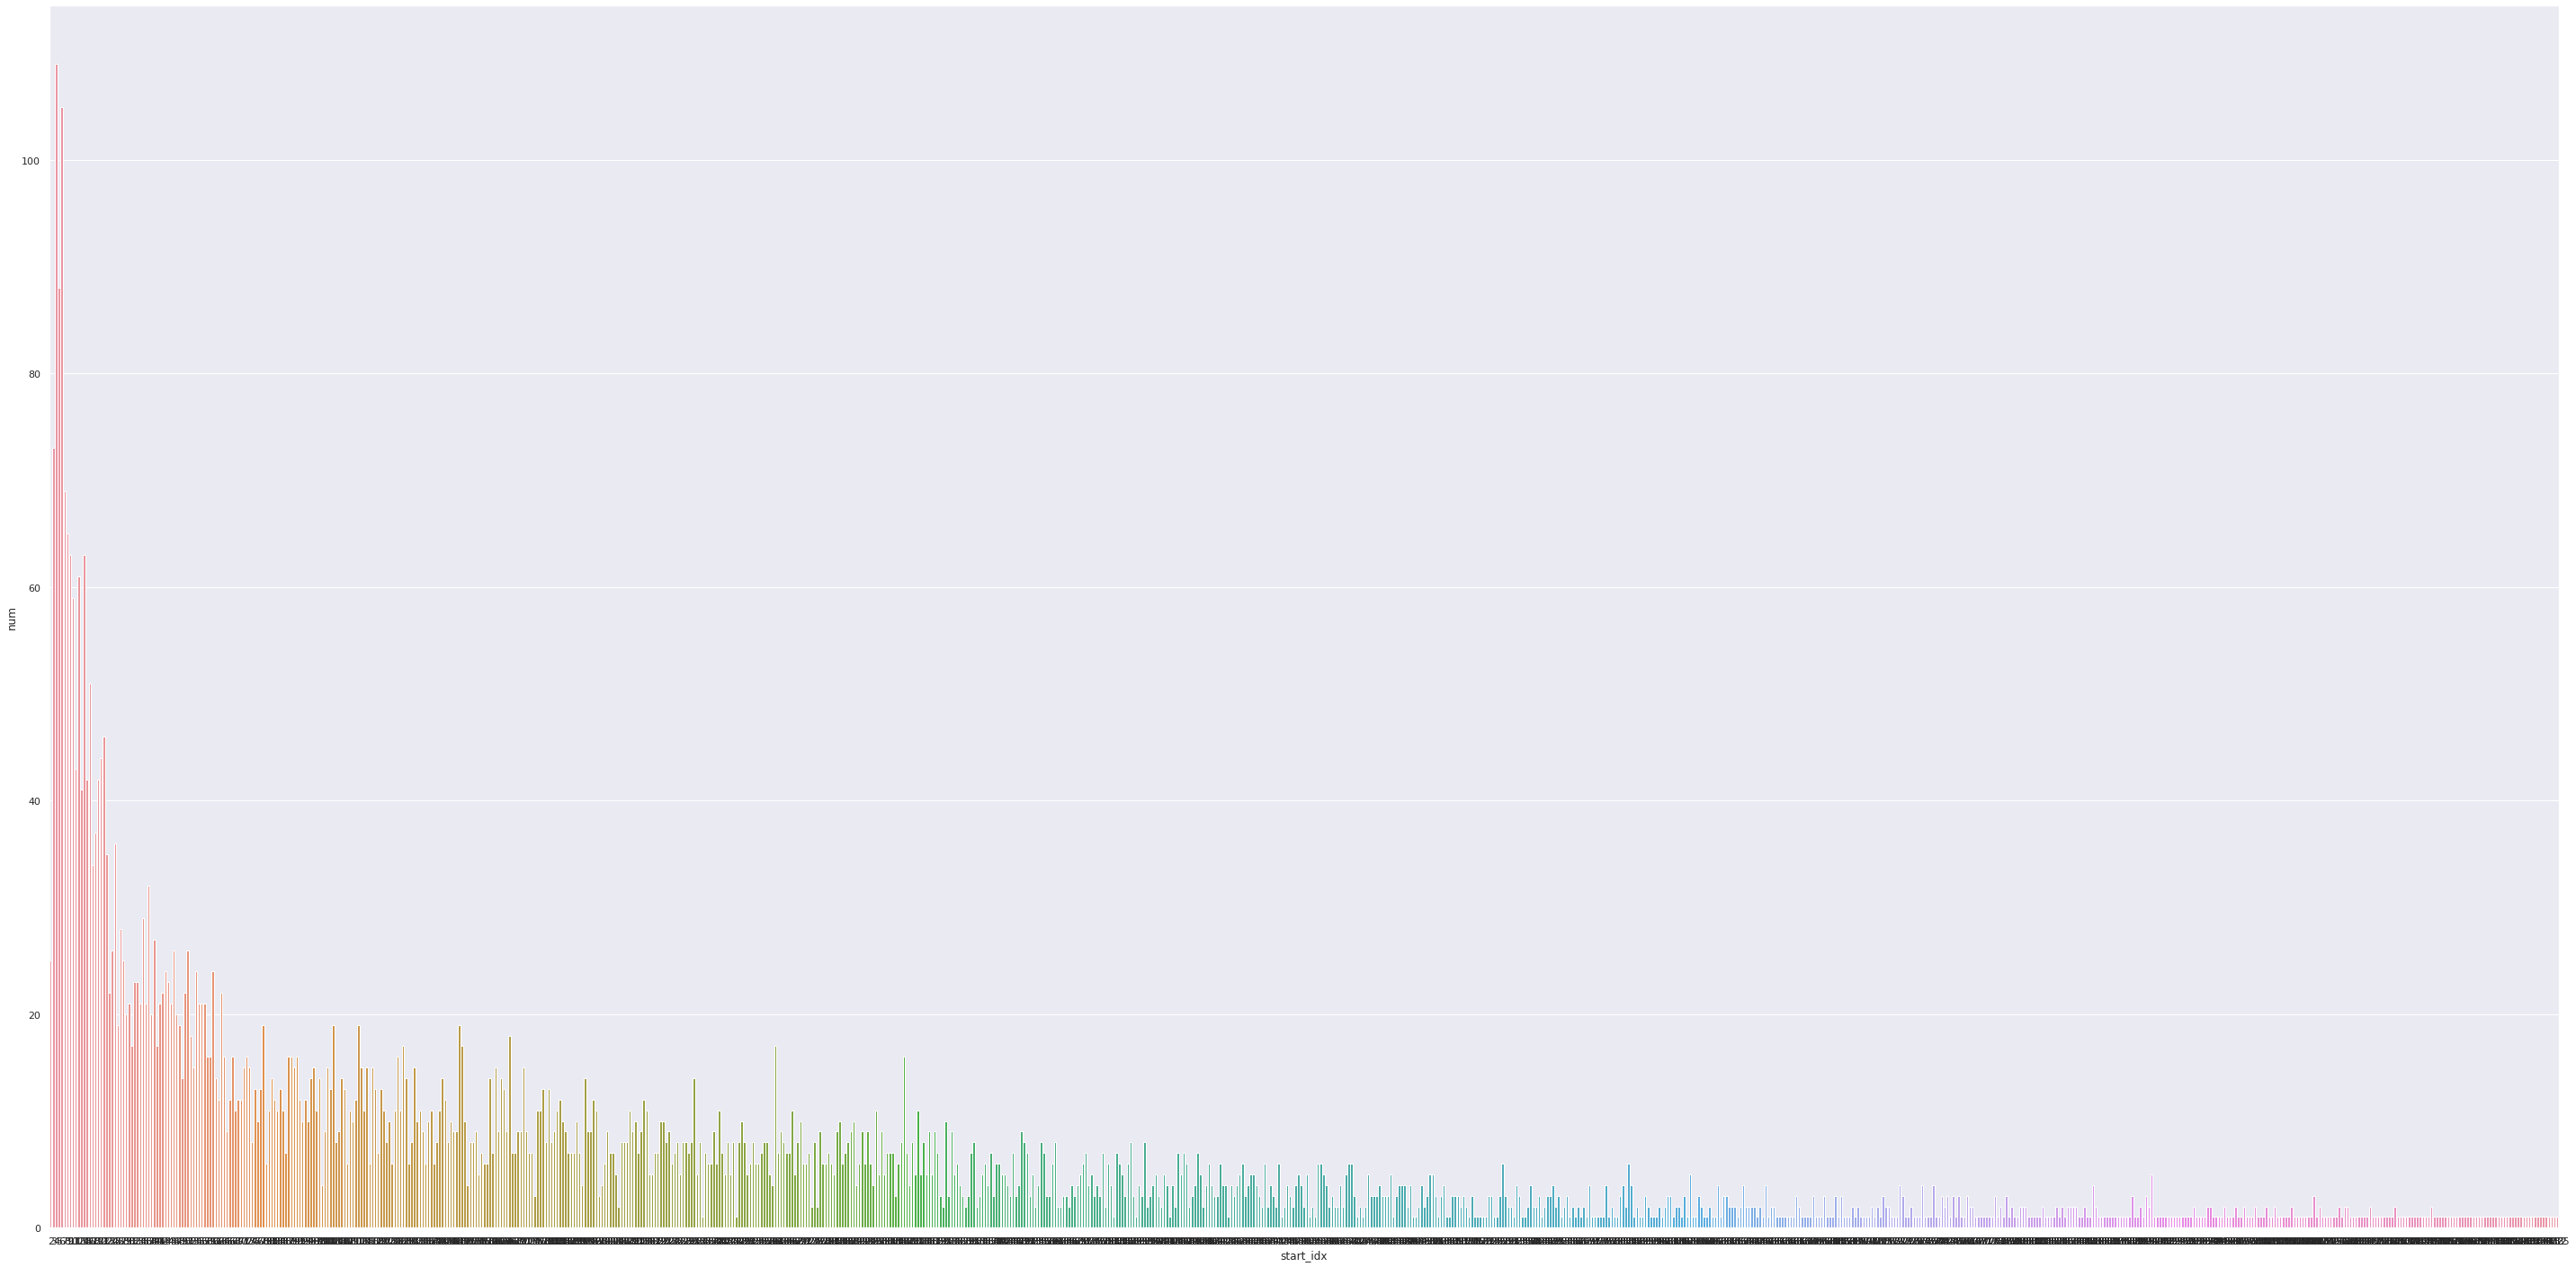

In [120]:
sns.barplot(data=df, x="start_idx", y="num",)

In [26]:
eval(a)['answer_start'][0]

6

In [6]:
wiki_dataset['train']['question']

['제2차 세계 대전 이후 동부 갈리치아 지방은 누구에게 지배를 받았는가?',
 '랭카스터 대학에서 Lancaster University라고 표기하는 대학은?',
 '이리퍼블릭의 시민들을 강화시키며 국가의 역량에 필요한 것은?',
 '영어 어휘의 기여도가 가장 높은게 뭐야?',
 '우리 은하에서 가장 강렬하게 빛나는 별이 뭐야?',
 '사분율에서 석석하는 소리에는 어떤 이름이 붙었어?',
 '마산회원구의 행정구역명이 뭐야?',
 '그녀의 첫 작품이 데뷔한 곳은?',
 '학계는 인도가 언제부터 철을 주로 사용해 도구를 만들었다고 생각하나요?',
 '제 2차 바르바리 전쟁에서 미국과 트리폴리의 신민 도시 데르나를 함락시킨 사람이 누구야?',
 '2017년 1월 리그 오브 레전드 챌린저스 코리아 스프링 2017에서 주전 원거리 딜러로 활동하며 좋은 경기력을 선보인 선수는?',
 '게임 폴아웃 시리즈의 다섯 번째 주요 작품은?',
 '중앙아시아,남아시아,사하라사막을 제외한 아프리카 전역에 분포하는 뱀의 총칭은?',
 '평상시 기독교선교사들로부터 차별적 대우를 받은 윤치호가 생각한 미국의 중대한 속성은?',
 '본진이 일어난 진앙지 이외의 장소에서 일어난 대륙판 내 혹은 해양판 내 또는 기타 해구형지진을 의미하는 것은?',
 '달빛에 의해 만들어지는 무지개의 이름은?',
 '조선전기 묘지명 연구에 중요한 자료가 뭐야?',
 '민물에 사는 재첩이라는 뜻을 가진 종은?',
 '조지아의 주요 경제 분야가 뭐야?',
 '현대중공업이 여객선사업을 포기한 이유가 뭐야?',
 '영화 천년환생은 누가 만들었어?',
 '1280년에서 1292년까지 불가리아의 차르를 차지한 사람은?',
 '튀코 브라헤와 달리 코페르니쿠스의 주장만 믿은 사람은?',
 '꿀풀과와 유사하게 생긴 식물은?',
 '콜드데크 시스템을 개발한 회사가 어디야?',
 '왕온수에 대한 소문을 들은 무제가 부여한 직위는?',
 '모든 월드컵 경기에서 사용한 축구공은 어느 회사에서 만든거야?',
 '전도체에서 초전도체로 전

In [9]:
a = [1]*wiki_dataset['train'].__len__()
b = ['b']*wiki_dataset['train'].__len__()

In [31]:
answers = []
context = []
question = []
id = []
for idx, i in enumerate(df_qg, start=1):
    context.append(i['context'])
    answers.append(i['answers'])
    question.append(i['question'])
    id.append(str(idx))
wiki_qg_df = pd.DataFrame(data={'__index_level_0__':a, 'answers':answers,'context':context,'document_id':a, 'id':id, 'question':question,'title':answers})

TypeError: string indices must be integers

In [11]:
wiki_qg_df

,__index_level_0__,answers,context,document_id,id,question,title
0,1,"{'answer_start': [4], 'text': ['해안포']}",대포를 해안포로 활용한 것은 16세기 유럽에서 시작되었다. 유럽 본토와 식민지의 항...,1,1,16세기 유럽에서 대포를 무엇으로 활용하였는가?,"{'answer_start': [4], 'text': ['해안포']}"
1,1,"{'answer_start': [0], 'text': ['올라프 구드뢰다르손']}","올라프 구드뢰다르손(Óláfr Guðrøðarsson구드뢰드의 아들 올라프, Aml...",1,2,아믈리브 막 고프라드의 아들 이름이 뭐야?,"{'answer_start': [0], 'text': ['올라프 구드뢰다르손']}"
2,1,"{'answer_start': [0], 'text': ['500엔 동전']}",500엔 동전(五百円硬貨)은 일본 정부가 발행하는 동전의 하나이다. 1982년 4월...,1,3,일본 정부가 발행하는 동전이 뭐야?,"{'answer_start': [0], 'text': ['500엔 동전']}"
3,1,"{'answer_start': [209], 'text': ['베르누이 방정식']}",베르누이의 방정식은 비압축성 유동(incompressible flow)에 대해서만 ...,1,4,하나의 유선상 총 에너지가 일정할 때 어떤 방정식이 유효해?,"{'answer_start': [209], 'text': ['베르누이 방정식']}"
4,1,"{'answer_start': [1], 'text': ['혈계전선']}",《혈계전선》의 줄거리는 범죄와 맞서는 결사인 '라이브라'와 이들이 헬사렘즈로트 시에...,1,5,범죄와 맞서는 결사인 '라이브라'와 이들이 헬사렘즈로트 시에서 벌이는 전투에 초점을...,"{'answer_start': [1], 'text': ['혈계전선']}"
...,...,...,...,...,...,...,...
15536,1,"{'answer_start': [241], 'text': ['허광한']}","젊을 때 창읍애왕의 낭(郞)을 지냈는데, 무제를 따라 감천궁에 갔을 때 실수로 다른...",1,15537,반란을 일으킨 여태자의 손자인 유병이의 아버지가 누구야?,"{'answer_start': [241], 'text': ['허광한']}"
15537,1,"{'answer_start': [459], 'text': ['유로파리그 준결승전 진...","페네르바흐체는 2012년 6월 6일에 우찬을 140만 유로에 계약을 했고, 계약기간...",1,15538,우찬의 데뷔골 덕분에 페네르바흐체가 얻은 것은 무엇인가?,"{'answer_start': [459], 'text': ['유로파리그 준결승전 진..."
15538,1,"{'answer_start': [843], 'text': ['울산시']}",1957년 울산광역시에서 태어나 경남고등학교와 서울대학교 법과대학을 졸업하고 제22...,1,15539,2004년 태화들 회의록 관련 소송에서 패한 것은?,"{'answer_start': [843], 'text': ['울산시']}"
15539,1,"{'answer_start': [266], 'text': ['이몽학']}",왕족의 서얼 출신으로 홍산현 구룡 사람이다. 서울에 살았으나 성품이 불량하고 행실도...,1,15540,임진왜란 때 반란을 일으킨 사람이 누구야?,"{'answer_start': [266], 'text': ['이몽학']}"


In [12]:
a = Dataset.from_pandas(wiki_qg_df)

In [13]:
a

Dataset({
    features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
    num_rows: 15541
})

In [45]:
a.save_to_disk('merge_dataset')

In [54]:
datasets = load_from_disk('/opt/ml/data/qg_train_test')

In [55]:
datasets

Dataset({
    features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
    num_rows: 20722
})

In [34]:
a = a.train_test_split()

In [35]:
a

DatasetDict({
    train: Dataset({
        features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
        num_rows: 15541
    })
    test: Dataset({
        features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
        num_rows: 5181
    })
})

In [36]:
a.save_to_disk('qg_train_test')

In [10]:
wiki_dataset = Dataset.from_dict({'__index_level_0__':wiki['__index_level_0__'], 'answers':a,'context':wiki['context'],'document_id':wiki['document_id'], 'id':wiki['id'], 'question':wiki['question'],'title':wiki['title']})
# dataset_with_duplicates = dataset.map(lambda batch: {"b": batch["a"] * 2}, remove_columns=["a"], batched=True)
# len(dataset_with_duplicates)